## Solving Assignment 1

In [348]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
from matplotlib import cm # for colormaps
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm # for progress bar
from steady_state import obj_ss_kl
import pandas as pd

from HANCModel import HANCModelClass

from helpfuncs import * # For plotting and caluclating across loops

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [92]:
output_folder = r"output"
saved_folder = r"saved"

# Do slow computations (or just load them from the saved folder )

do_computations = False

### 2: solve stationary equilibrium

In [93]:
model = HANCModelClass(name='A1') # create an instance of the model

ss =model.ss
par  =model.par
# Preset calibration
ss.taua = 0.1
ss.taul = 0.3
ss.G = 0.3


#### sub: problem with multiple equilibria

In [95]:
kl_list, clearing_list = clearing_across_kl(model,0.1,9,100)

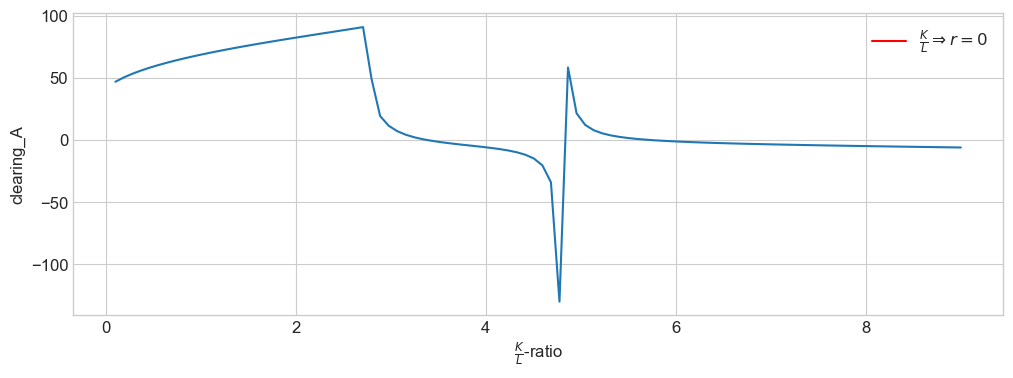

In [96]:

klguess0 = (model.par.delta/(model.par.alpha*model.ss.Gamma))**(1/(model.par.alpha-1))

fig1 = plot_clearing_across_kl(kl_list,clearing_list,'clearing_A')
ax = fig1.axes[0]
ax.axvline(klguess0, color='r', label='$\\frac{K}{L} \Rightarrow r=0$')
ax.legend();


In [97]:
fig1.savefig(output_folder+'\kl_clearing_A')

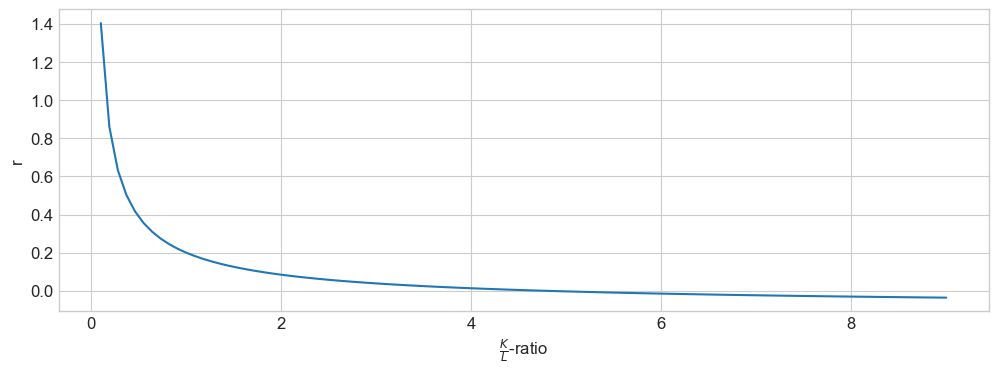

In [98]:
_ = plot_clearing_across_kl(kl_list,clearing_list,'r')

##### What happens for $\tau^{\ell}=0.1$

In [133]:
model_lowtaul = model.copy()
model_lowtaul.ss.taul=0.1

In [134]:
kl_list, clearing_list = clearing_across_kl(model_lowtaul,1.,7.,100)

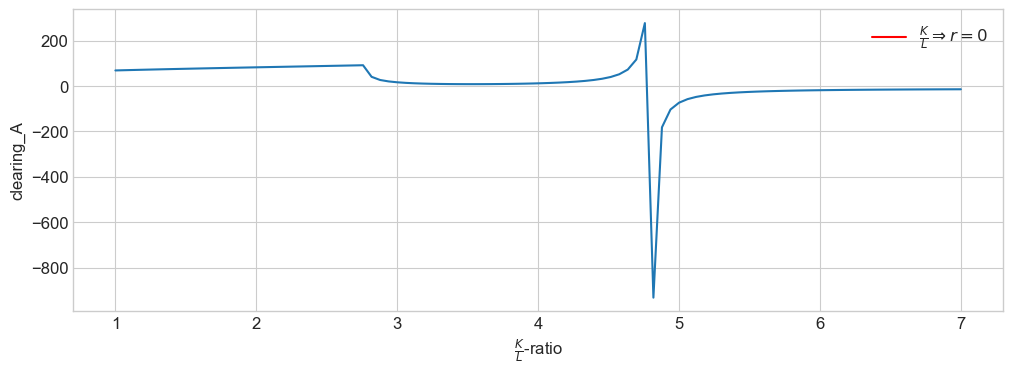

In [135]:
fig2 = plot_clearing_across_kl(kl_list,clearing_list,'clearing_A')
ax = fig2.axes[0]
ax.axvline(klguess0, color='r', label='$\\frac{K}{L} \Rightarrow r=0$')
ax.legend();


In [136]:
fig2.savefig(output_folder+'\kl_clearing_A_lowtaul')

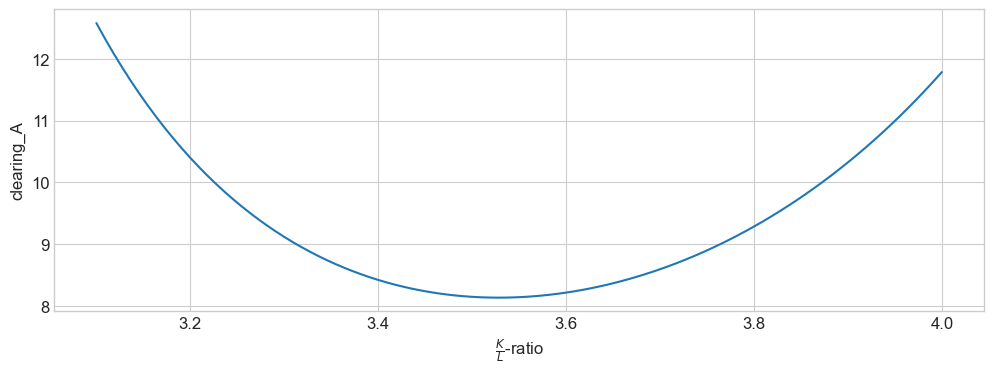

In [137]:
kl_list_zoom, clearing_list_zoom = clearing_across_kl(model_lowtaul,3.1,4.,100)
fig = plot_clearing_across_kl(kl_list_zoom,clearing_list_zoom,'clearing_A')

##### sub: what happens for $G=\tau^{a}=\tau^{\ell}=0$?

In [138]:
model_nogov = model.copy()
model_nogov.ss.taul=0.
model_nogov.ss.taua=0.
model_nogov.ss.G=0.

In [209]:
kl_list, clearing_list = clearing_across_kl(model_nogov,0.1,8.,500)

c:\Users\hms467\OneDrive - University of Copenhagen\Documents\Uni\11. semester\AMHA\AdvMacroHet\Assignments\Handin\A1_hanc\steady_state.py:283: RuntimeWarning: invalid value encountered in double_scalars
  ss.Y = ss.Gamma*ss.K**par.alpha*ss.L**(1-par.alpha)


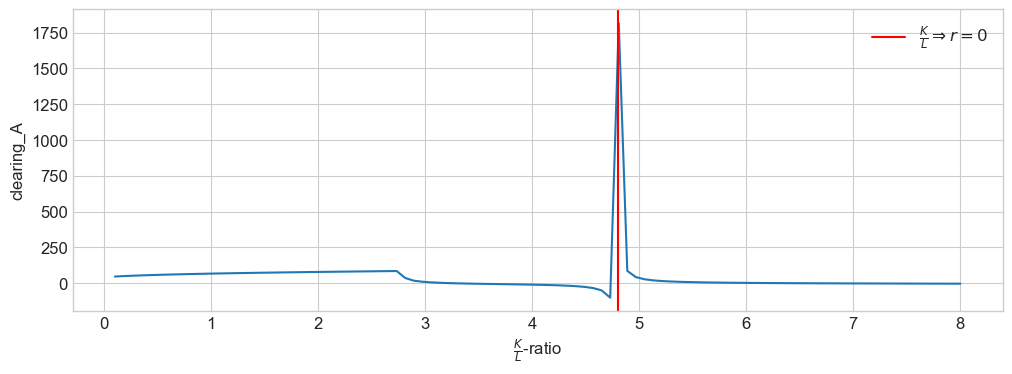

In [232]:
fig3 = plot_clearing_across_kl(kl_list,clearing_list,'clearing_A')
klguess0 = (model_nogov.par.delta/(model_nogov.par.alpha*model_nogov.ss.Gamma))**(1/(model_nogov.par.alpha-1))
ax = fig3.axes[0]
ax.axvline(klguess0, color='r', label='$\\frac{K}{L} \Rightarrow r=0$')
ax.legend();

In [212]:
fig3.savefig(output_folder+r'\kl_clearing_A_nogov')

In [213]:
model_nogov = model.copy()
model_nogov.ss.taul=0.1
model_nogov.ss.taua=0.1
model_nogov.ss.G=0.

In [214]:
kl_list, clearing_list = clearing_across_kl(model_nogov,0.1,8.,100)

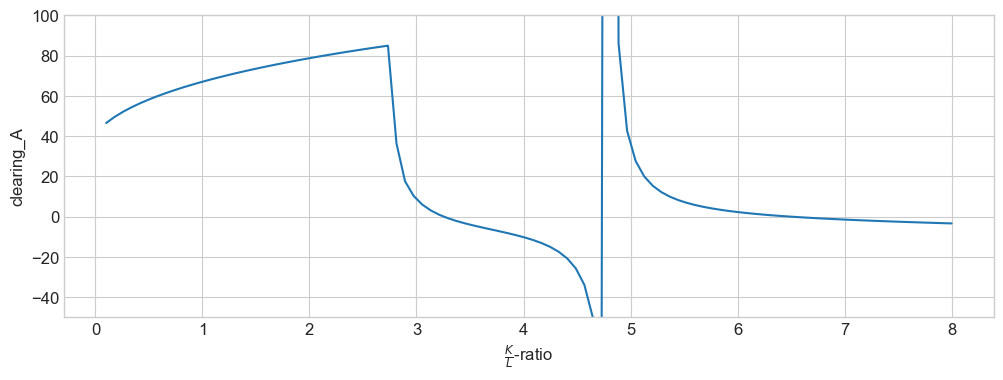

In [220]:
fig = plot_clearing_across_kl(kl_list,clearing_list,'clearing_A')
ax = fig.axes[0]
ax.set_ylim(-50,100);

#### Sub: solve across K and L

In [ ]:
# Slower, less stable, and not easy to choose between equilibria 
model.find_ss(method='root',x0=(6,0.9) ,root_method='hybr', do_print=True)

### step 1 going strait to optimize.root with guess (K,L) = (6.00,0.90)
    fjac: array([[-0.99999491, -0.003192  ],
       [ 0.003192  , -0.99999491]])
     fun: array([ 2.23439933e-10, -1.53210777e-13])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([ 2.80176788e-07, -1.08476513e-09])
       r: array([  5.5532091 , -13.91599054,   0.93469143])
  status: 1
 success: True
       x: array([5.92759472, 1.03523469])
found steady state in 2.3 secs


In [ ]:
model.find_ss(method='root',x0=(3.4,0.9) ,root_method='hybr', do_print=True)

### step 1 going strait to optimize.root with guess (K,L) = (3.40,0.90)
    fjac: array([[-0.99997826,  0.00659394],
       [-0.00659394, -0.99997826]])
     fun: array([-8.21086144e-09,  3.68513220e-10])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([ 1.95372398e-07, -7.47835925e-09])
       r: array([  9.2259743 , -41.3985242 ,   1.54295237])
  status: 1
 success: True
       x: array([3.41876263, 1.01204318])
found steady state in 5.5 secs


#### Aggregate quantities and prices

In [228]:
model.find_ss(method='kl',roption='positive', do_print=True)

  0: KL =   3.61241057 -> A_clearing =  -2.60377191
  1: KL =   3.45865827 -> A_clearing =  -1.02073946
  2: KL =   3.36158236 -> A_clearing =   0.23229258
  3: KL =   3.37957872 -> A_clearing =  -0.02065139
  4: KL =   3.37810942 -> A_clearing =  -0.00040865
  5: KL =   3.37807981 -> A_clearing =  -0.00000002
  6: KL =   3.37807979 -> A_clearing =   0.00000029

KL =   3.37807981 [A_clearing =  -0.00000002]

found steady state in 4.0 secs


In [132]:
for varname in model.varlist:
    print(f'{varname:15s}: {model.ss.__dict__[varname]:.4f}')

Y              : 1.4581
C              : 0.8163
I              : 0.3419
G              : 0.3000
IB             : 0.0000
Gamma          : 1.0000
K              : 3.4188
L              : 1.0120
KL             : 3.3781
B              : 0.6267
taxa           : 0.0113
taxl           : 0.3062
rk             : 0.1280
w              : 1.0086
r              : 0.0280
taua           : 0.1000
taul           : 0.3000
A_hh           : 4.0455
C_hh           : 0.8163
ELL_hh         : 1.0812
U_hh           : -2.0131
L_hh           : 1.0120
clearing_A     : 0.0000
clearing_C     : -0.0000
clearing_L     : 0.0000


In [227]:
# equilibrium with negative r
model_neg = model.copy()
model_neg.find_ss(method='kl',roption='negative', do_print=True)

  0: KL =  13.40782982 -> A_clearing = -10.10573426
  1: KL =   9.61623813 -> A_clearing =  -6.66339842
  2: KL =   7.33021206 -> A_clearing =  -4.03452256
  3: KL =   6.18719902 -> A_clearing =  -1.79188077
  4: KL =   5.61569251 -> A_clearing =   0.65888444
  5: KL =   5.76934115 -> A_clearing =  -0.22515670
  6: KL =   5.73020833 -> A_clearing =  -0.02336565
  7: KL =   5.72583228 -> A_clearing =   0.00007544
  8: KL =   5.72584636 -> A_clearing =  -0.00000030
  9: KL =   5.72584631 -> A_clearing =  -0.00000000
 10: KL =   5.72584627 -> A_clearing =   0.00000018

KL =   5.72584631 [A_clearing =  -0.00000000]

found steady state in 2.6 secs


In [64]:
for varname in model_neg.varlist:
    print(f'{varname:15s}: {model_neg.ss.__dict__[varname]:.4f}')

Y              : 1.7474
C              : 0.8546
I              : 0.5928
G              : 0.3000
IB             : 0.0000
Gamma          : 1.0000
K              : 5.9276
L              : 1.0352
KL             : 5.7258
B              : -5.7749
taxa           : -0.0002
taxl           : 0.3670
rk             : 0.0884
w              : 1.1815
r              : -0.0116
taua           : 0.1000
taul           : 0.3000
A_hh           : 0.1527
C_hh           : 0.8546
ELL_hh         : 1.1382
U_hh           : -2.0001
L_hh           : 1.0352
clearing_A     : 0.0000
clearing_C     : -0.0000
clearing_L     : 0.0000


In [139]:
# Technically bounding between 0 and the kl that makes r=0, is not valid for the nogov model, 
# but it works in this case
model_nogov.ss.taul=0.
model_nogov.ss.taua=0.
model_nogov.find_ss(method='kl',roption='positive', do_print=True)

  0: KL =   4.35504750 -> A_clearing =  -3.09691710
  1: KL =   3.00180634 -> A_clearing =  26.15042575
  2: KL =   4.21175669 -> A_clearing =  -2.70854722
  3: KL =   3.60678151 -> A_clearing =   0.60201273
  4: KL =   3.71679394 -> A_clearing =  -0.36027526
  5: KL =   3.67560590 -> A_clearing =  -0.03078196
  6: KL =   3.67194521 -> A_clearing =   0.00012973
  7: KL =   3.67196057 -> A_clearing =  -0.00000052
  8: KL =   3.67196051 -> A_clearing =  -0.00000000
  9: KL =   3.67196048 -> A_clearing =   0.00000020

KL =   3.67196051 [A_clearing =  -0.00000000]

found steady state in 4.7 secs


In [148]:
## Make a nice table 
varlist = ['Y', 'C', 'I', 'K', 'L', 'KL', 'B', 'taxa', 'taxl', 'w', 'r',  'A_hh', 'C_hh', 'ELL_hh', 'U_hh','taua', 'taul', 'G', 'clearing_A', 'clearing_C', 'clearing_L']

In [150]:
def g_dataframe(model,varlist=varlist):
    dict = {var: getattr(model.ss,var) for var in varlist}
    return pd.DataFrame.from_dict(dict,orient='index')


In [151]:
pd.options.display.float_format = '{:,.3f}'.format

In [205]:
df = g_dataframe(model)
df.rename(columns={0:'$r>0$'},inplace=True)
df['$r<0$'] = g_dataframe(model_neg)[0]
df['no gov'] = g_dataframe(model_nogov)[0]
df

,$r>0$,$r<0$,no gov
Y,1.458,1.747,1.364
C,0.816,0.855,1.025
I,0.342,0.593,0.339
K,3.419,5.928,3.391
L,1.012,1.035,0.923
KL,3.378,5.726,3.672
B,0.627,-5.775,-0.000
taxa,0.011,-0.000,0.000
taxl,0.306,0.367,0.000
w,1.009,1.182,1.034


In [206]:
df.rename(index={'taxa':'$\int \\tau^{a}_{ss}r_{ss}a^{*}_{ss}d\mathbf{D}_{ss}$',
        'taxl':'$\int \\tau^{\ell}_{ss}w_{ss}\ell_{ss}\zeta_{i}z_{ss}d\mathbf{D}_{ss}$',
        'taua':'$\\tau^{a}$','taul':'$\\tau^{\ell}$',
        'ELL_hh':'$\ell\_hh$',
        'A_hh':'$\int a^{*}_{ss} d\mathbf{D}_{ss}$',
        'C_hh':'$\int c^{*}_{ss} d\mathbf{D}_{ss}$',
        'U_hh':'$\int u \left(c^{*}_{ss} \\right) d\mathbf{D}_{ss}$',
        'clearing_A':'Assets clearing',
        'clearing_C':'Goods clearing',
        'clearing_L':'Labor clearing'},inplace=True)



In [208]:

df.style.to_latex(output_folder+r'\table1.tex',hrules=True)

#### Illustrate household behavior

In [347]:
par = model.par
ss = model.ss
for i_fix in range(par.Nfix):
    print(f'Type {i_fix+1}:')
    print(f'zeta   = {par.zeta_grid[i_fix]}, varphi = {par.varphi_grid[i_fix]}')
    c = np.sum(ss.c[i_fix]*ss.D[i_fix])*par.Nfix
    print(f'C*   = {c:.3f}')
    
    a = np.sum(ss.a[i_fix]*ss.D[i_fix])* par.Nfix
    print(f'a*   = {a:.3f}')

    ell = np.sum(ss.ell[i_fix]*ss.D[i_fix])*par.Nfix
    print(f'ell* = {ell:.3f}')

    u = np.sum(ss.u[i_fix]*ss.D[i_fix])*par.Nfix
    print(f'u*   = {u:.3f}')


Type 1:
zeta   = 0.9, varphi = 0.9
C*   = 0.787
a*   = 3.901
ell* = 1.155
u*   = -2.076
Type 2:
zeta   = 0.9, varphi = 1.1
C*   = 0.736
a*   = 3.649
ell* = 1.080
u*   = -2.219
Type 3:
zeta   = 1.1, varphi = 0.9
C*   = 0.900
a*   = 4.460
ell* = 1.080
u*   = -1.816
Type 4:
zeta   = 1.1, varphi = 1.1
C*   = 0.842
a*   = 4.171
ell* = 1.010
u*   = -1.941


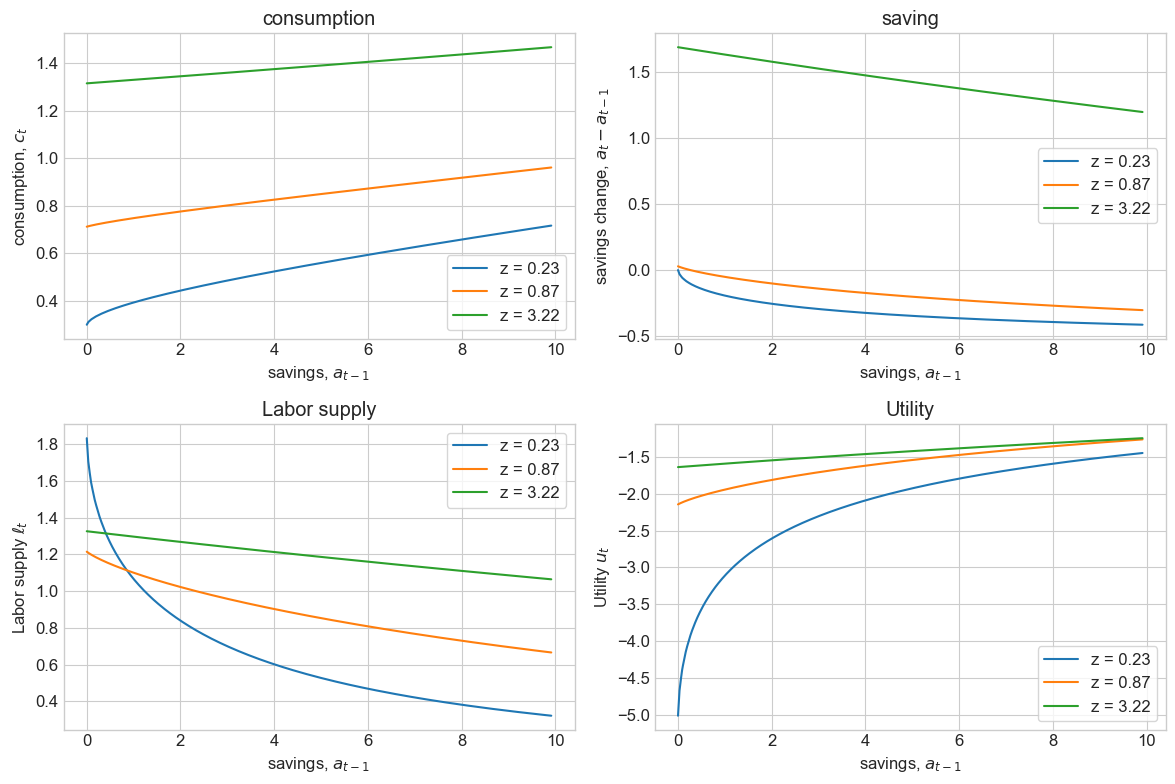

In [239]:

fig = plt.figure(figsize=(12,8),dpi=100)
par = model.par
I = par.a_grid < 10

def plotax(subi,title,ylabel,var):
    # a. consumption
    ax = fig.add_subplot(2,2,subi)
    ax.set_title(title)

    for i_z,z in enumerate(par.z_grid):
        if i_z%3 == 0 or i_z == par.Nz-1:
            ax.plot(par.a_grid[I],np.sum(var[:,i_z,I]*par.probfix[:,np.newaxis],axis=0),label=f'z = {z:.2f}')

    ax.legend(frameon=True)
    ax.set_xlabel('savings, $a_{t-1}$')
    ax.set_ylabel(ylabel)


plotax(1,f'consumption','consumption, $c_t$',ss.c)
plotax(2,f'saving','savings change, $a_{t}-a_{t-1}$',ss.a- par.a_grid[np.newaxis,np.newaxis,:])

plotax(3,f'Labor supply','Labor supply $\ell_{t}$',ss.ell)

plotax(4,f'Utility','Utility $u_{t}$',ss.u)


fig.tight_layout()

In [240]:
fig.savefig(output_folder+r'\hh_behav_z')

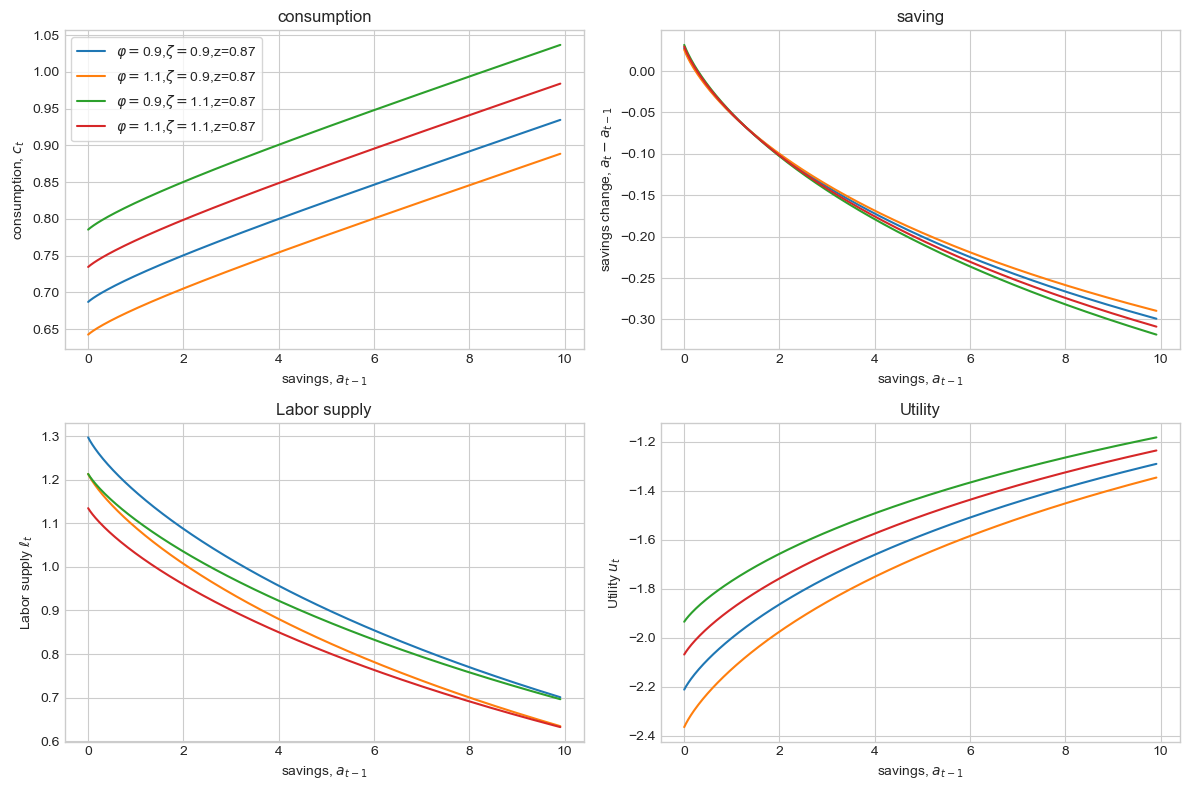

In [281]:
fig = plt.figure(figsize=(12,8),dpi=100)
par = model.par
I = par.a_grid < 10
z_fix = 3

def plotax(subi,title,ylabel,var):
    # a. consumption
    ax = fig.add_subplot(2,2,subi)
    ax.set_title(title)

    for i_fix in range(par.Nfix):
        ax.plot(par.a_grid[I],var[i_fix,z_fix,I],label=f'$\\varphi=${par.varphi_grid[i_fix]},$\zeta=${par.zeta_grid[i_fix]},z={par.z_grid[z_fix]:.2f}')

    ax.set_xlabel('savings, $a_{t-1}$')
    ax.set_ylabel(ylabel)
    return ax


ax1 = plotax(1,f'consumption','consumption, $c_t$',ss.c)

ax2 = plotax(2,f'saving','savings change, $a_{t}-a_{t-1}$',ss.a- par.a_grid[np.newaxis,np.newaxis,:])

ax3 = plotax(3,f'Labor supply','Labor supply $\ell_{t}$',ss.ell)

ax4 = plotax(4,f'Utility','Utility $u_{t}$',ss.u)

ax1.legend(frameon=True)

fig.tight_layout()

In [282]:
fig.savefig(output_folder+r'\hh_behav_fix')

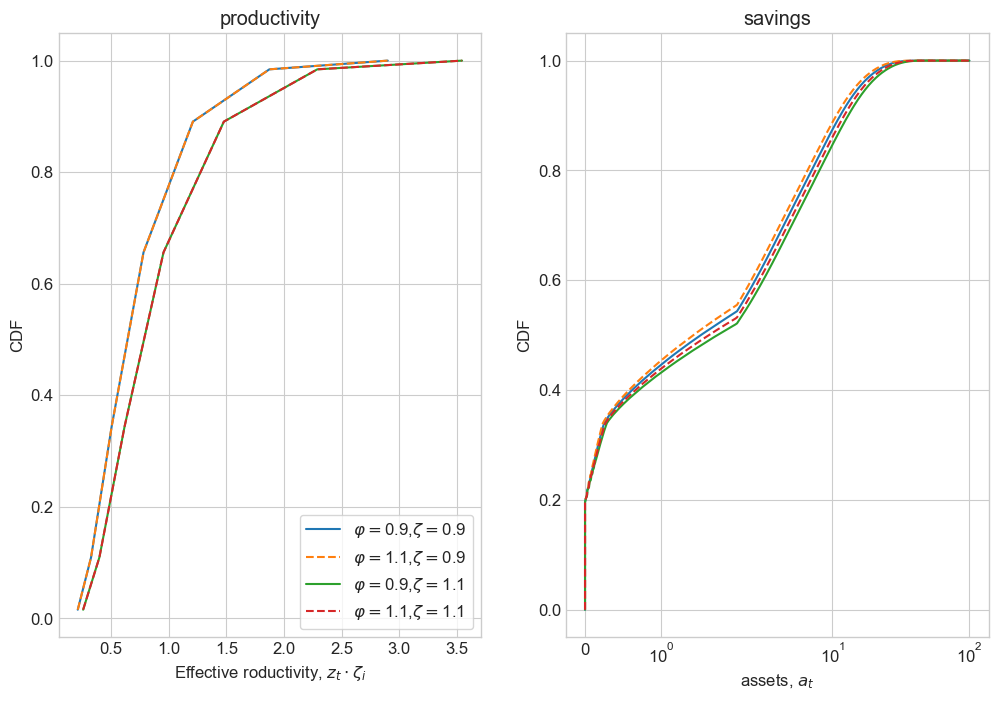

In [243]:
fig = plt.figure(figsize=(12,8),dpi=100)

# a. income
ax = fig.add_subplot(1,2,1)
ax.set_title('productivity')
for i_fix in range(par.Nfix):
    if i_fix%2==0:
        linestyle='-'
    else:
        linestyle = '--'
    ax.plot(par.z_grid*par.zeta_grid[i_fix],4*np.cumsum(np.sum(ss.D[i_fix],axis=(1))),label=f'$\\varphi=${par.varphi_grid[i_fix]},$\zeta=${par.zeta_grid[i_fix]}',linestyle=linestyle)

ax.legend(frameon=True)

ax.set_xlabel('Effective roductivity, $z_{t}\cdot\zeta_{i}$')
ax.set_ylabel('CDF')

# b. assets
ax = fig.add_subplot(1,2,2)
ax.set_title('savings')
for i_fix in range(par.Nfix):
    if i_fix%2==0:
        linestyle='-'
    else:
        linestyle = '--'
    ax.plot(np.insert(par.a_grid,0,par.a_grid[0]),4*np.insert(np.cumsum(np.sum(ss.D[i_fix],axis=0)),0,0.0),linestyle=linestyle)
ax.set_xlabel('assets, $a_{t}$')
ax.set_ylabel('CDF')
ax.set_xscale('symlog');

In [244]:
fig.savefig(output_folder+r'\hh_dist_of_z_a')

### 3: Illustrate how changes in the tax rate affect the stationary equilibria

In [ ]:
# these takes a lot of time to run, so one can instead load them from the saved_folder

In [ ]:
if do_computations:
    model_dict_pos = make_model_dict(model,20,0.,0.9,roption='positive')

In [ ]:
if do_computations:
    model_dict_neg = make_model_dict(model,20,0.,0.9,roption='negative')

In [383]:
do_computations = True
if do_computations:
    model_dict_zoom_pos = make_model_dict(model,10,0.24,0.4,roption='positive')

 10%|█         | 1/10 [00:47<07:05, 47.32s/it]

In [ ]:
if do_computations:
    model_dict_zoom_neg = make_model_dict(model,10,0.24,0.4,roption='negative')

In [ ]:
# save results 
if do_computations:
    np.save(saved_folder + r'\model_dict_pos.npy',model_dict_pos)
    np.save(saved_folder + r'\model_dict_neg.npy',model_dict_neg)
    np.save(saved_folder + r'\model_dict_zoom_pos.npy',model_dict_zoom_pos)
    np.save(saved_folder + r'\model_dict_zoom_neg.npy',model_dict_zoom_neg)

In [247]:
# load results instead
if do_computations==False:
    model_dict_pos = np.load(saved_folder + r'\model_dict_pos.npy',allow_pickle=True).item()
    model_dict_neg = np.load(saved_folder + r'\model_dict_neg.npy',allow_pickle=True).item()
    model_dict_zoom_pos = np.load(saved_folder + r'\model_dict_zoom_pos.npy',allow_pickle=True).item()
    model_dict_zoom_neg = np.load(saved_folder + r'\model_dict_zoom_neg.npy',allow_pickle=True).item()


In [325]:
%matplotlib widget

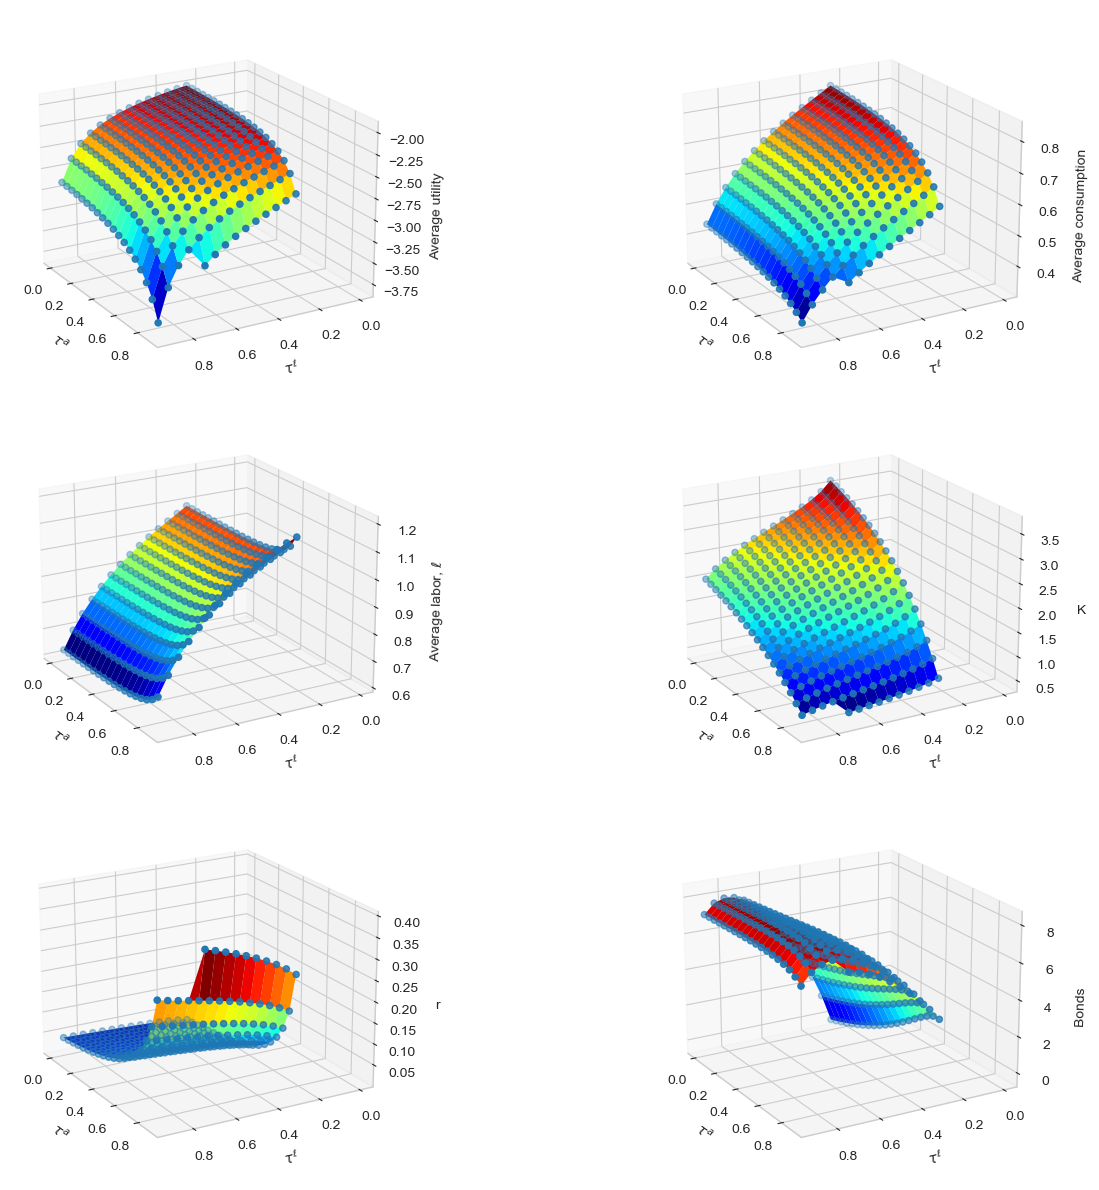

In [349]:
fig = plot_over_taugrid(model_dict_pos,{'U_hh':'Average utility','C_hh':'Average consumption','ELL_hh':'Average labor, $\\ell$','K':'K','r':'r','B':'Bonds'},rows=3,cols=2)
fig.savefig(output_folder+r'\3dtau_pos')

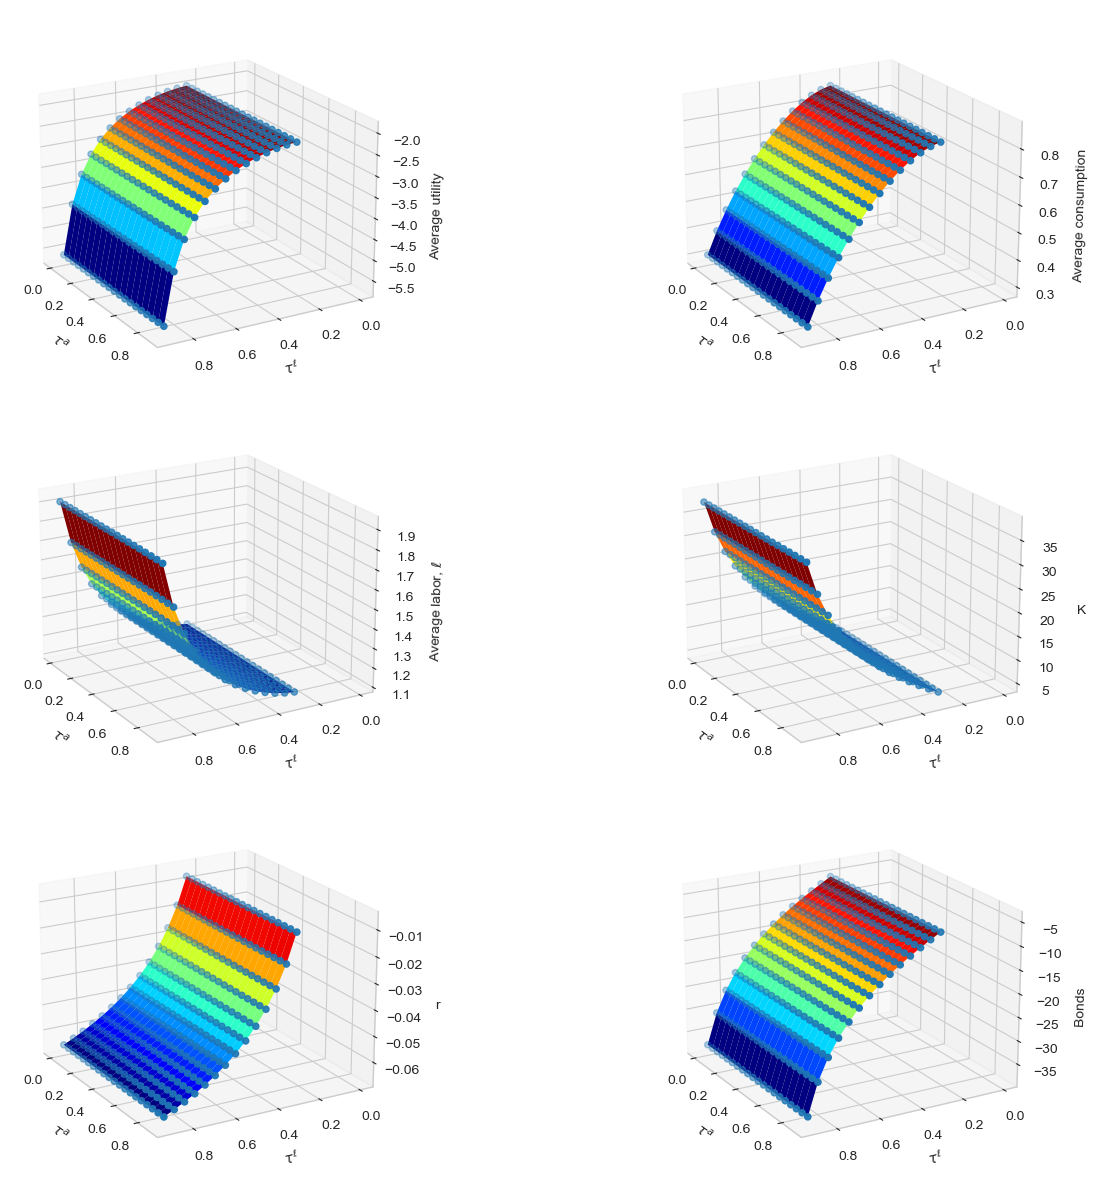

In [350]:
fig = plot_over_taugrid(model_dict_neg,{'U_hh':'Average utility','C_hh':'Average consumption','ELL_hh':'Average labor, $\\ell$','K':'K','r':'r','B':'Bonds'},rows=3,cols=2)
fig.savefig(output_folder+r'\3dtau_neg')

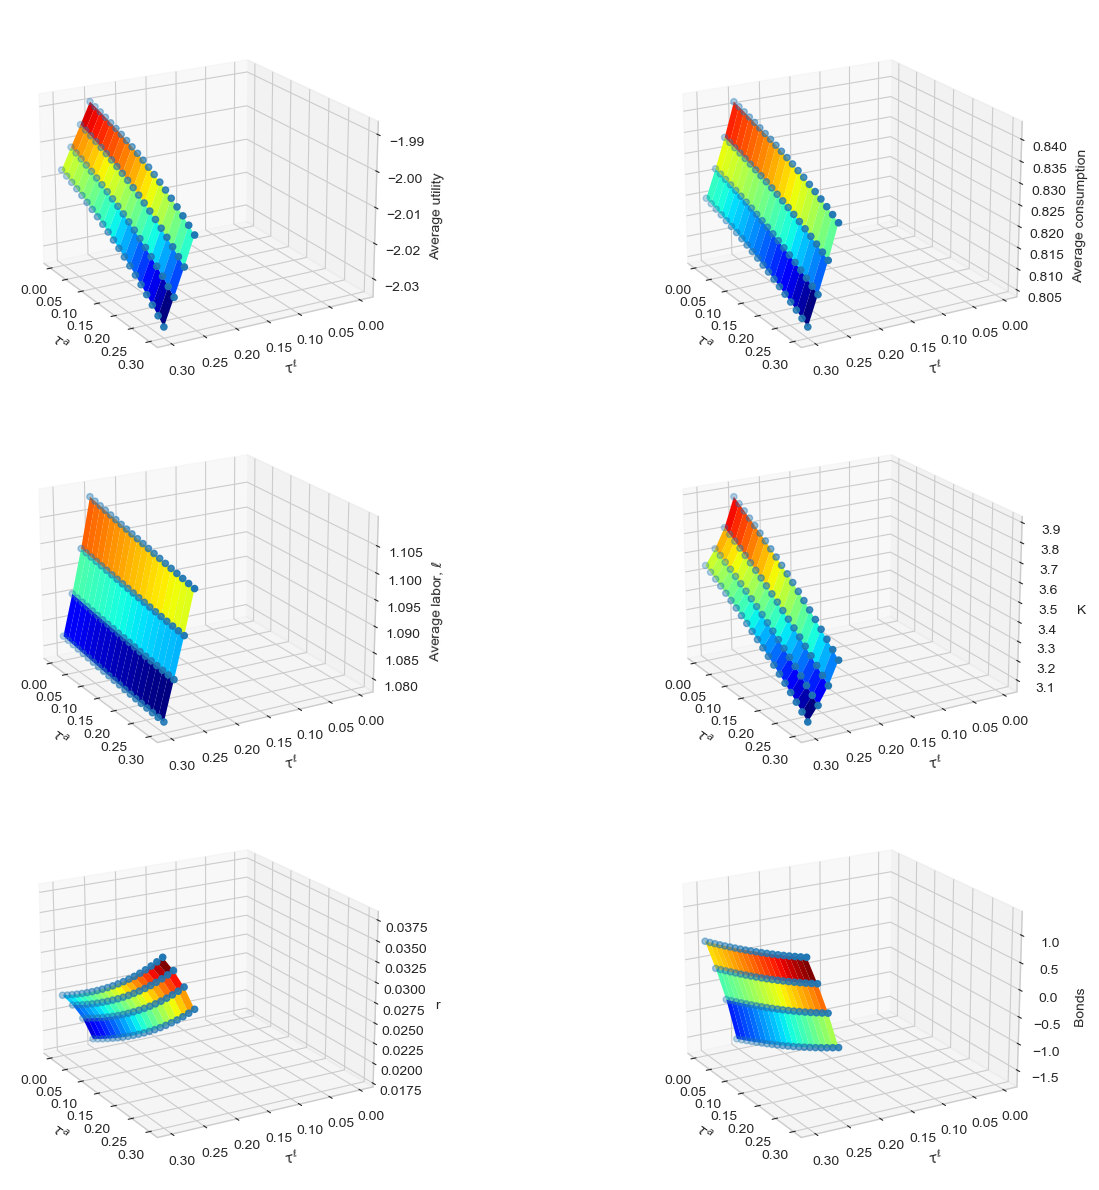

In [337]:
fig = plot_over_taugrid(model_dict_zoom_pos,{'U_hh':'Average utility','C_hh':'Average consumption','ELL_hh':'Average labor, $\\ell$','K':'K','r':'r','B':'Bonds'},rows=3,cols=2)

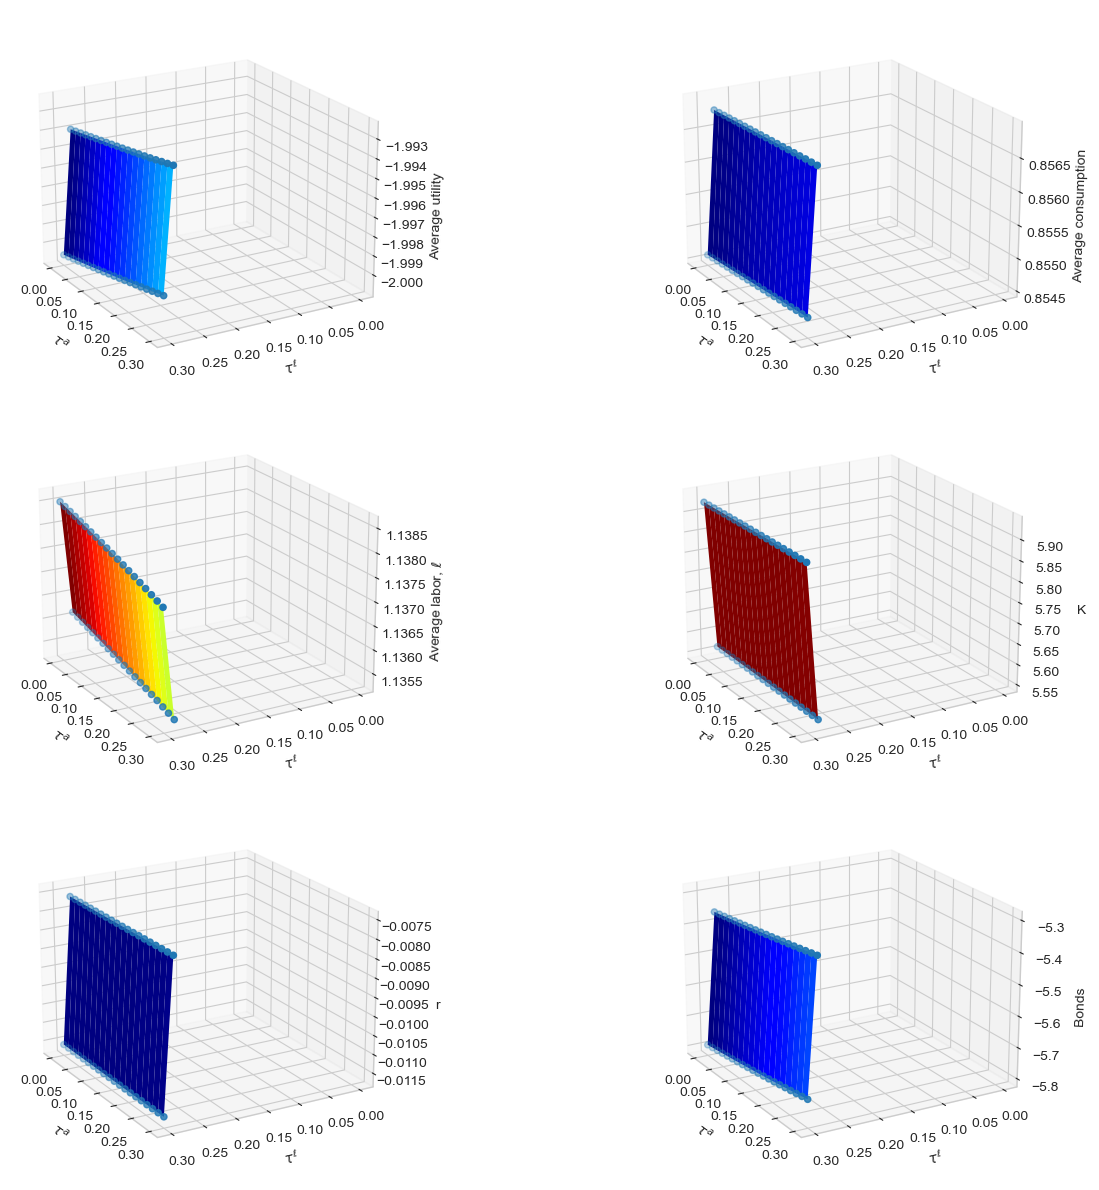

In [352]:
fig = plot_over_taugrid(model_dict_zoom_neg)

In [341]:
%matplotlib inline

#### Model with G=0

In [356]:
model_nogov_dict_pos = make_model_dict(model_nogov,10,0.,0.9,roption='positive')

100%|██████████| 10/10 [12:28<00:00, 74.88s/it]


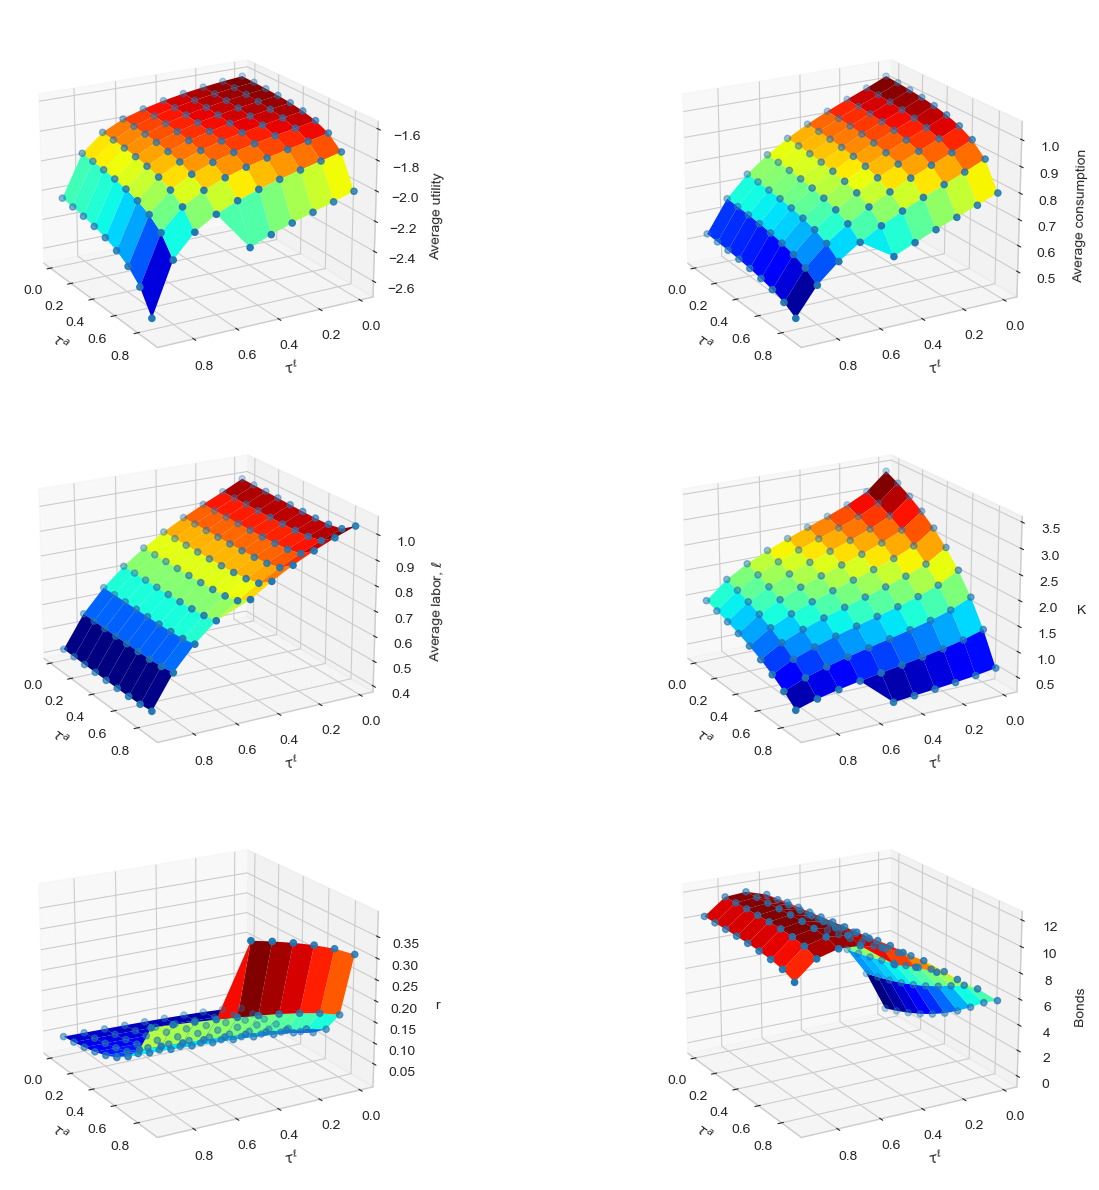

In [357]:
fig = plot_over_taugrid(model_nogov_dict_pos)
fig.savefig(output_folder+r'\3dtau_nogov_pos')

In [358]:
model_nogov_dict_neg = make_model_dict(model_nogov,10,0.,0.9,roption='negative')

100%|██████████| 10/10 [02:56<00:00, 17.65s/it]


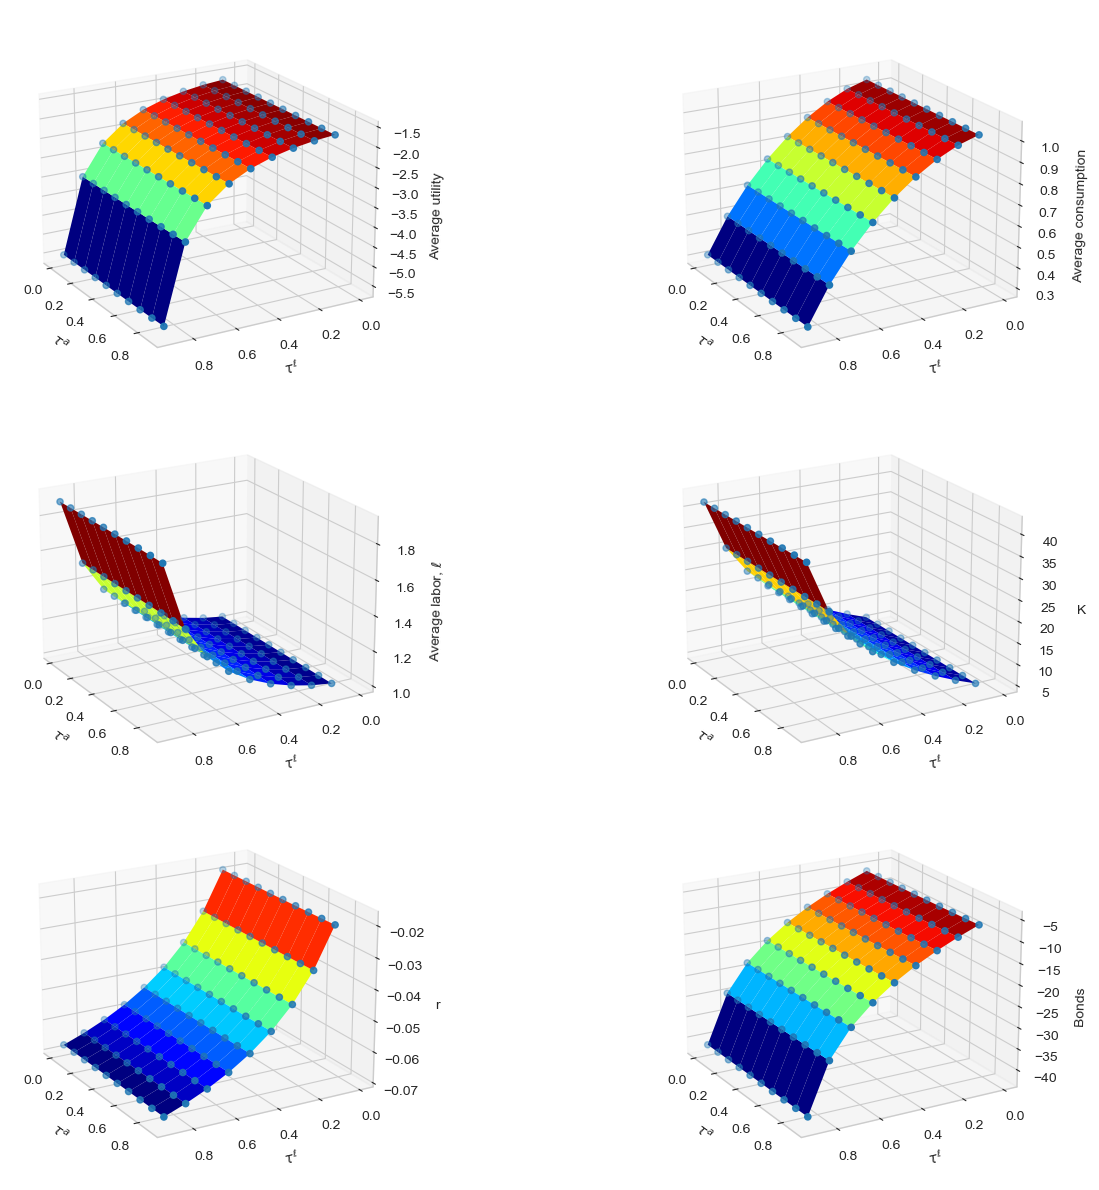

In [359]:
fig = plot_over_taugrid(model_nogov_dict_neg)

### 4 Maximize household utility as social welfare criterion

In [371]:
def obj_welfare(x,model,roption='positive'):
    # reset tax rates:  
    ss =model.ss
    ss.taua = x[0]
    ss.taul = x[1]

    # Solve model 
    try:
        model.find_ss(roption=roption,do_print=False)
        # return welfare
        return - model.ss.U_hh
    except:
        # Note that model is not solved and return large value to discourage optimizer
        return - model.ss.U_hh+100

In [374]:
obj_welfare([0.001,0.001],model_nogov)

1.6251656695227303

In [375]:
obj_welfare([0.0,0.0],model_nogov)

1.6250261334862477

In [376]:
obj_welfare([0.1,0.1],model_nogov)

1.6428308404276653

In [379]:
obj_welfare([0.001,0.001],model_nogov)

1.6251656695227303

In [380]:
x = optimize.minimize(obj_welfare,x0= [0.1,0.1],args=(model_nogov,),bounds=((0.,0.9),(0.,.9)),method='nelder-mead')
x

 final_simplex: (array([[0., 0.],
       [0., 0.],
       [0., 0.]]), array([1.62502613, 1.62502613, 1.62502613]))
           fun: 1.6250261334862477
       message: 'Optimization terminated successfully.'
          nfev: 28
           nit: 14
        status: 0
       success: True
             x: array([0., 0.])

In [381]:
x = optimize.minimize(obj_welfare,x0= [0.1,0.1],args=(model_nogov,'negative'),bounds=((0.,1.0),(0.,.9)),method='nelder-mead')
x

 final_simplex: (array([[0.9       , 0.01475069],
       [0.9       , 0.01476194],
       [0.9       , 0.01484273]]), array([1.62682474, 1.62682549, 1.62683088]))
           fun: 1.626824741503456
       message: 'Optimization terminated successfully.'
          nfev: 120
           nit: 60
        status: 0
       success: True
             x: array([0.9       , 0.01475069])

In [ ]:
obj_welfare([0.9,0.01])

In [382]:
x = optimize.minimize(obj_welfare,x0= [0.01,0.01],args=(model,),bounds=((0.,0.9),(0.,.9)),method='nelder-mead')
x

 final_simplex: (array([[0., 0.],
       [0., 0.],
       [0., 0.]]), array([101.6378221, 101.6378221, 101.6378221]))
           fun: 101.63782210337052
       message: 'Optimization terminated successfully.'
          nfev: 28
           nit: 14
        status: 0
       success: True
             x: array([0., 0.])

### 5 Suggest and implement an extension which improves the tax system